In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('indicator_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99246 entries, 0 to 99245
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   classification         99246 non-null  object 
 1   alert_escalation_date  99246 non-null  object 
 2   alert_id_fk            99246 non-null  int64  
 3   insert_date            99246 non-null  object 
 4   score                  99246 non-null  int64  
 5   employee_id            99246 non-null  int64  
 6   risk_factor            99246 non-null  float64
 7   avg_score              99246 non-null  int64  
 8   hru                    99246 non-null  object 
 9   indicators             99246 non-null  object 
 10  alert_category         99246 non-null  object 
 11  alert_type             99246 non-null  object 
 12  indicator_source       99246 non-null  object 
 13  indicator_heat_score   54768 non-null  float64
dtypes: float64(2), int64(4), object(8)
memory usage: 10.6+

In [6]:
df.head(5)

,classification,alert_escalation_date,alert_id_fk,insert_date,score,employee_id,risk_factor,avg_score,hru,indicators,alert_category,alert_type,indicator_source,indicator_heat_score
0,TP/DE,1/2/19,1926516433,12/21/18,400,31037207271,3.636364,110,None,App_9_Heat_Email_IND,Heat,Daily_Heat,App_9,3.0
1,TP/DE,1/2/19,1926516433,12/21/18,400,31037207271,3.636364,110,None,App_3_Heat_Email_ZIP,Heat,Daily_Heat,App_3,5.0
2,TP/DE,1/2/19,1926516433,12/21/18,400,31037207271,3.636364,110,None,Threshold_Heat_Email_IND,Heat,Daily_Heat,Threshold,0.0
3,TP/LOW,1/2/19,988775910,12/21/18,10,7278169210,-1.000000,-1,None,App_13_Atomic_Email_IND,Atomic,Atomic,App_13,NaN
4,TP/DE,1/2/19,1973699404,12/21/18,416,31037207271,3.714286,112,None,App_9_Heat_Email_IND,Heat,Daily_Heat,App_9,3.0


In [7]:
df[['classification','risk_factor','avg_score','indicator_heat_score','score']].groupby(['classification'],as_index=False) \
                                                                               .mean().round(2).sort_values(by='risk_factor')

,classification,risk_factor,avg_score,indicator_heat_score,score
1,TP/DE,9.01,308.12,6.58,4249.51
3,TP/LOW,19.77,1269.50,3.46,29646.16
0,FP,19.81,135.02,6.08,2457.98
2,TP/HIGH,22.22,1538.16,2.81,38053.38


In [8]:
df[['alert_type','risk_factor','avg_score','indicator_heat_score','score']].groupby(['alert_type'],as_index=False) \
                                                                           .mean().round(2).sort_values(by='risk_factor')

,alert_type,risk_factor,avg_score,indicator_heat_score,score
0,Atomic,-1.00,-1.00,3.80,10.00
1,Daily_Heat,5.12,410.72,3.08,2213.03
3,Weekly_Heat,13.28,589.49,6.67,8211.60
2,Monthly_Heat,22.13,606.93,7.63,16811.63


In [9]:
ob = pd.read_csv('obfuscated_demo_data2.csv')

In [10]:
ob.shape

(3159, 11)

In [11]:
ob.isnull().sum()

employee_id              0
person_type              0
person_status            0
ge_hire_date           478
city                   142
state_name             174
country_name           174
function_group         174
job_function             0
career_band              0
industry_focus_name      0
dtype: int64

In [12]:
ob.head(5)

,employee_id,person_type,person_status,ge_hire_date,city,state_name,country_name,function_group,job_function,career_band,industry_focus_name
0,2163707601,EMPLOYEE,A,9/1/1997 0:00,Reau,No_Data,France,Production,JOB_FUNCTION_7,CAREER_BAND_10,BUSINESS_SEGMENT_4
1,9225331209,EMPLOYEE,A,8/22/2006 0:00,Dubai,Dubai,United Arab Emirates,Commercial,JOB_FUNCTION_22,CAREER_BAND_9,BUSINESS_SEGMENT_4
2,9777696464,EMPLOYEE,I,3/1/2007 0:00,Dubai,Dubai,United Arab Emirates,Production,JOB_FUNCTION_24,CAREER_BAND_4,BUSINESS_SEGMENT_4
3,8893235549,EMPLOYEE,A,9/1/2003 0:00,Dzierzoniow,Lower Silesian,Poland,Enabling,JOB_FUNCTION_10,CAREER_BAND_4,BUSINESS_SEGMENT_4
4,1310142434,EMPLOYEE,I,9/4/2000 0:00,Veresegyhaz,Pest,Hungary,Production,JOB_FUNCTION_7,CAREER_BAND_10,BUSINESS_SEGMENT_4


In [13]:
print(ob.nunique())

employee_id            3157
person_type               4
person_status             2
ge_hire_date           1424
city                    171
state_name               93
country_name             28
function_group            3
job_function             26
career_band              10
industry_focus_name      15
dtype: int64


In [14]:
plot = ob[['job_function','employee_id']].groupby(['job_function'],as_index=False).count()

<AxesSubplot:xlabel='employee_id', ylabel='job_function'>

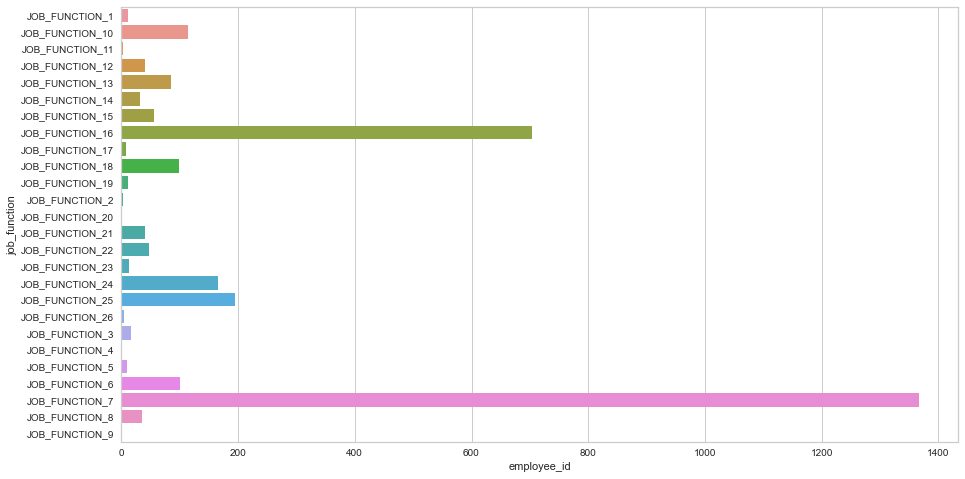

In [15]:
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
#rcParams['figure.figsize'] = 15,8
sns.barplot(y='job_function',x='employee_id', data=plot, orient="h")
#plt.xticks(rotation=60)

array([<AxesSubplot:ylabel='employee_id'>], dtype=object)

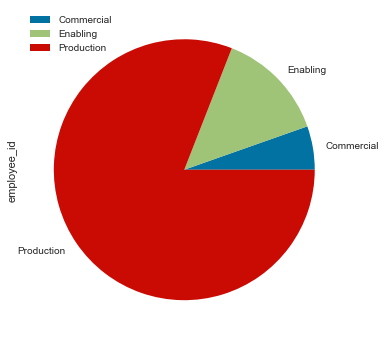

In [16]:
ob[['function_group','employee_id']].groupby(['function_group']).count().plot.pie(subplots=True, figsize=(11, 6))

In [17]:
indicator_pair = pd.read_csv('indicator_pairs_data_updated.csv')

In [18]:
indicator_pair.head(5)

,alert_escalation_date,alert_id_fk,insert_date,score,owner_name,employee_id,risk_factor,avg_score,classification,hru,alert_category,alert_type,indicator_pairs
0,1/17/18,903129831,12/20/17,10,Senior_Analyst_1,5160501257,-1.0,-1,TP/DE,HRU11,Atomic,Atomic,App_9_Atomic_DVD_Burn_IND
1,1/17/18,184172653,12/20/17,10,Senior_Analyst_1,5160501257,-1.0,-1,TP/DE,HRU11,Atomic,Atomic,App_9_Atomic_DVD_Burn_IND
2,1/17/18,1144943035,12/20/17,10,Senior_Analyst_1,5160501257,-1.0,-1,TP/DE,HRU11,Atomic,Atomic,App_9_Atomic_DVD_Burn_IND
3,1/17/18,1478996666,12/20/17,10,Senior_Analyst_1,5160501257,-1.0,-1,TP/DE,HRU11,Atomic,Atomic,App_9_Atomic_DVD_Burn_IND
4,1/17/18,942102898,12/20/17,10,Senior_Analyst_1,5160501257,-1.0,-1,TP/DE,HRU11,Atomic,Atomic,App_9_Atomic_DVD_Burn_IND


In [19]:
df.head(5)

,classification,alert_escalation_date,alert_id_fk,insert_date,score,employee_id,risk_factor,avg_score,hru,indicators,alert_category,alert_type,indicator_source,indicator_heat_score
0,TP/DE,1/2/19,1926516433,12/21/18,400,31037207271,3.636364,110,None,App_9_Heat_Email_IND,Heat,Daily_Heat,App_9,3.0
1,TP/DE,1/2/19,1926516433,12/21/18,400,31037207271,3.636364,110,None,App_3_Heat_Email_ZIP,Heat,Daily_Heat,App_3,5.0
2,TP/DE,1/2/19,1926516433,12/21/18,400,31037207271,3.636364,110,None,Threshold_Heat_Email_IND,Heat,Daily_Heat,Threshold,0.0
3,TP/LOW,1/2/19,988775910,12/21/18,10,7278169210,-1.000000,-1,None,App_13_Atomic_Email_IND,Atomic,Atomic,App_13,NaN
4,TP/DE,1/2/19,1973699404,12/21/18,416,31037207271,3.714286,112,None,App_9_Heat_Email_IND,Heat,Daily_Heat,App_9,3.0


In [20]:
df.shape

(99246, 14)

In [21]:
indicator_pair.shape

(132079, 13)

In [22]:
# 
merge = pd.merge(df,indicator_pair,how='left', on=['classification', 'alert_escalation_date', 'alert_id_fk', 'insert_date',
                                                   'score', 'employee_id', 'risk_factor', 'avg_score', 'hru','alert_category', 'alert_type'])

In [23]:
final = pd.merge(merge, ob, on='employee_id', how='left')

In [24]:
final.shape

(99254, 26)

In [25]:
final.head(5)

,classification,alert_escalation_date,alert_id_fk,insert_date,score,employee_id,risk_factor,avg_score,hru,indicators,...,person_type,person_status,ge_hire_date,city,state_name,country_name,function_group,job_function,career_band,industry_focus_name
0,TP/DE,1/2/19,1926516433,12/21/18,400,31037207271,3.636364,110,None,App_9_Heat_Email_IND,...,CONTRACTOR,I,NaN,Petropolis,NaN,NaN,NaN,JOB_FUNCTION_24,CAREER_BAND_1,BUSINESS_SEGMENT_4
1,TP/DE,1/2/19,1926516433,12/21/18,400,31037207271,3.636364,110,None,App_3_Heat_Email_ZIP,...,CONTRACTOR,I,NaN,Petropolis,NaN,NaN,NaN,JOB_FUNCTION_24,CAREER_BAND_1,BUSINESS_SEGMENT_4
2,TP/DE,1/2/19,1926516433,12/21/18,400,31037207271,3.636364,110,None,Threshold_Heat_Email_IND,...,CONTRACTOR,I,NaN,Petropolis,NaN,NaN,NaN,JOB_FUNCTION_24,CAREER_BAND_1,BUSINESS_SEGMENT_4
3,TP/LOW,1/2/19,988775910,12/21/18,10,7278169210,-1.000000,-1,None,App_13_Atomic_Email_IND,...,EMPLOYEE,I,1/23/2006 0:00,Newark,Delaware,United States,Production,JOB_FUNCTION_16,CAREER_BAND_10,BUSINESS_SEGMENT_4
4,TP/DE,1/2/19,1973699404,12/21/18,416,31037207271,3.714286,112,None,App_9_Heat_Email_IND,...,CONTRACTOR,I,NaN,Petropolis,NaN,NaN,NaN,JOB_FUNCTION_24,CAREER_BAND_1,BUSINESS_SEGMENT_4


In [26]:
final['hru'].value_counts()

None     74765
HRU11    16976
HRU5      2319
HRU2      1184
HRU12     1019
HRU7       875
HRU13      842
HRU18      641
HRU19      319
HRU8       228
HRU3        57
HRU6        29
Name: hru, dtype: int64

In [27]:
 plot = final[['classification','alert_type','employee_id']].groupby(['classification','alert_type'],as_index=False).count()

Text(0.5, 0, 'Count')

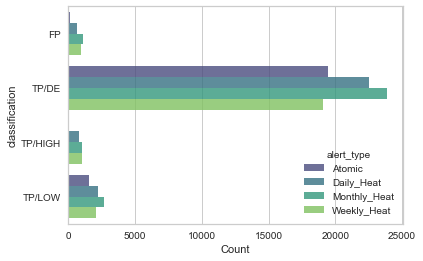

In [28]:
fig,ax=plt.subplots()
#plt.figure(figsize = (15,8))
ax = sns.barplot(y='classification',x='employee_id',hue='alert_type', data=plot, orient="h",alpha=.8, palette = "viridis")
plt.xlabel("Count")

In [29]:
 plot = final[['classification','job_function','employee_id']].groupby(['classification','job_function'],as_index=False).count()

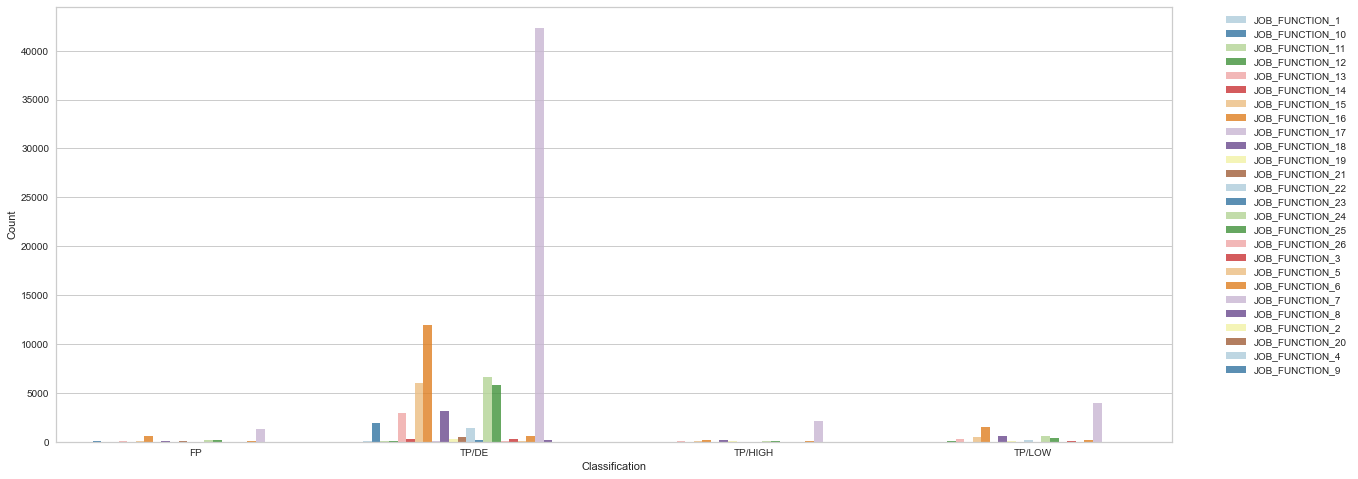

In [30]:
plt.figure(figsize = (20,8))
sns.barplot(x='classification',y='employee_id',hue='job_function', data=plot, orient="v",alpha=.8, palette = "Paired")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.04, 1))

In [31]:
final.columns

Index(['classification', 'alert_escalation_date', 'alert_id_fk', 'insert_date',
       'score', 'employee_id', 'risk_factor', 'avg_score', 'hru', 'indicators',
       'alert_category', 'alert_type', 'indicator_source',
       'indicator_heat_score', 'owner_name', 'indicator_pairs', 'person_type',
       'person_status', 'ge_hire_date', 'city', 'state_name', 'country_name',
       'function_group', 'job_function', 'career_band', 'industry_focus_name'],
      dtype='object')

In [32]:
final['alert_category'].value_counts()

Heat      78084
Atomic    21170
Name: alert_category, dtype: int64

In [33]:
final['career_band'].value_counts()

CAREER_BAND_10    33308
CAREER_BAND_4     29065
CAREER_BAND_6     12956
CAREER_BAND_8      6348
CAREER_BAND_7      4725
CAREER_BAND_1      4276
CAREER_BAND_3      3138
CAREER_BAND_5      2890
CAREER_BAND_2      2510
CAREER_BAND_9        38
Name: career_band, dtype: int64

In [34]:
drop_cols = ['alert_escalation_date', 'alert_id_fk', 'insert_date','employee_id','alert_category','indicator_source','indicator_pairs','person_type',
       'person_status', 'ge_hire_date', 'city', 'state_name', 'country_name']
final_df = final.drop(drop_cols,axis=1)

In [35]:
final_df.head(5)

,classification,score,risk_factor,avg_score,hru,indicators,alert_type,indicator_heat_score,owner_name,function_group,job_function,career_band,industry_focus_name
0,TP/DE,400,3.636364,110,None,App_9_Heat_Email_IND,Daily_Heat,3.0,Analyst_4,NaN,JOB_FUNCTION_24,CAREER_BAND_1,BUSINESS_SEGMENT_4
1,TP/DE,400,3.636364,110,None,App_3_Heat_Email_ZIP,Daily_Heat,5.0,Analyst_4,NaN,JOB_FUNCTION_24,CAREER_BAND_1,BUSINESS_SEGMENT_4
2,TP/DE,400,3.636364,110,None,Threshold_Heat_Email_IND,Daily_Heat,0.0,Analyst_4,NaN,JOB_FUNCTION_24,CAREER_BAND_1,BUSINESS_SEGMENT_4
3,TP/LOW,10,-1.000000,-1,None,App_13_Atomic_Email_IND,Atomic,NaN,Analyst_4,Production,JOB_FUNCTION_16,CAREER_BAND_10,BUSINESS_SEGMENT_4
4,TP/DE,416,3.714286,112,None,App_9_Heat_Email_IND,Daily_Heat,3.0,Analyst_4,NaN,JOB_FUNCTION_24,CAREER_BAND_1,BUSINESS_SEGMENT_4


In [36]:
final_df.shape

(99254, 13)

In [37]:
final_df.isnull().sum()

classification              0
score                       0
risk_factor                 0
avg_score                   0
hru                         0
indicators                  0
alert_type                  0
indicator_heat_score    44484
owner_name                550
function_group           4276
job_function                0
career_band                 0
industry_focus_name         0
dtype: int64

In [38]:
final_df.drop('indicator_heat_score',inplace=True, axis=1)

In [39]:
final_df['owner_name'].fillna('None',inplace=True)
final_df['function_group'].fillna('None',inplace=True)

In [40]:
final_uns = pd.get_dummies(final_df)

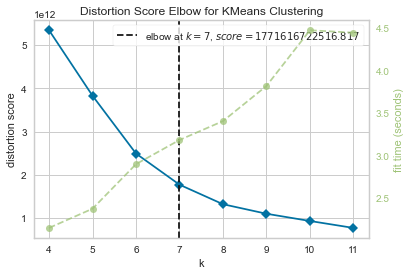

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(final_uns)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [46]:
train_df = final_df.drop(['classification'],axis=1)
train_df = pd.get_dummies(train_df)

X = train_df
y = final_df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6566

In [49]:
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)

0.8561

In [50]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)
RF.predict(X_test)
round(RF.score(X_test, y_test), 4)

0.8695

In [51]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_train, y_train)
NN.predict(X_test)
round(NN.score(X_test, y_test), 4)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8523

In [52]:
XGB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=1, random_state=0).fit(X_train, y_train)
XGB.predict(X_test)
round(XGB.score(X_test, y_test),4)

0.8724